1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform

2)

In [2]:
data = pd.read_csv('cardiaque.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


3)

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

il n'y pas de valeurs manquantes

4)

In [66]:
data_1= pd.read_csv('cardiaque_modifie.csv') # à faire
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


5)

In [67]:
transformer_colonne = preprocessing.LabelEncoder()
data.sex = transformer_colonne.fit_transform(data.sex)
data.output = transformer_colonne.fit_transform(data.output)
data.exng = transformer_colonne.fit_transform(data.exng)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
age = data.age
sex = data.sex
chest_pain = data.cp
tension_arteriel = data.trtbps
chol = data.chol
glycemie = data.fbs
electro_cardio = data.restecg
frequence_cardiaque_max = data.thalachh
angine = data.exng
oldpeak = data.oldpeak
chance = data.output

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


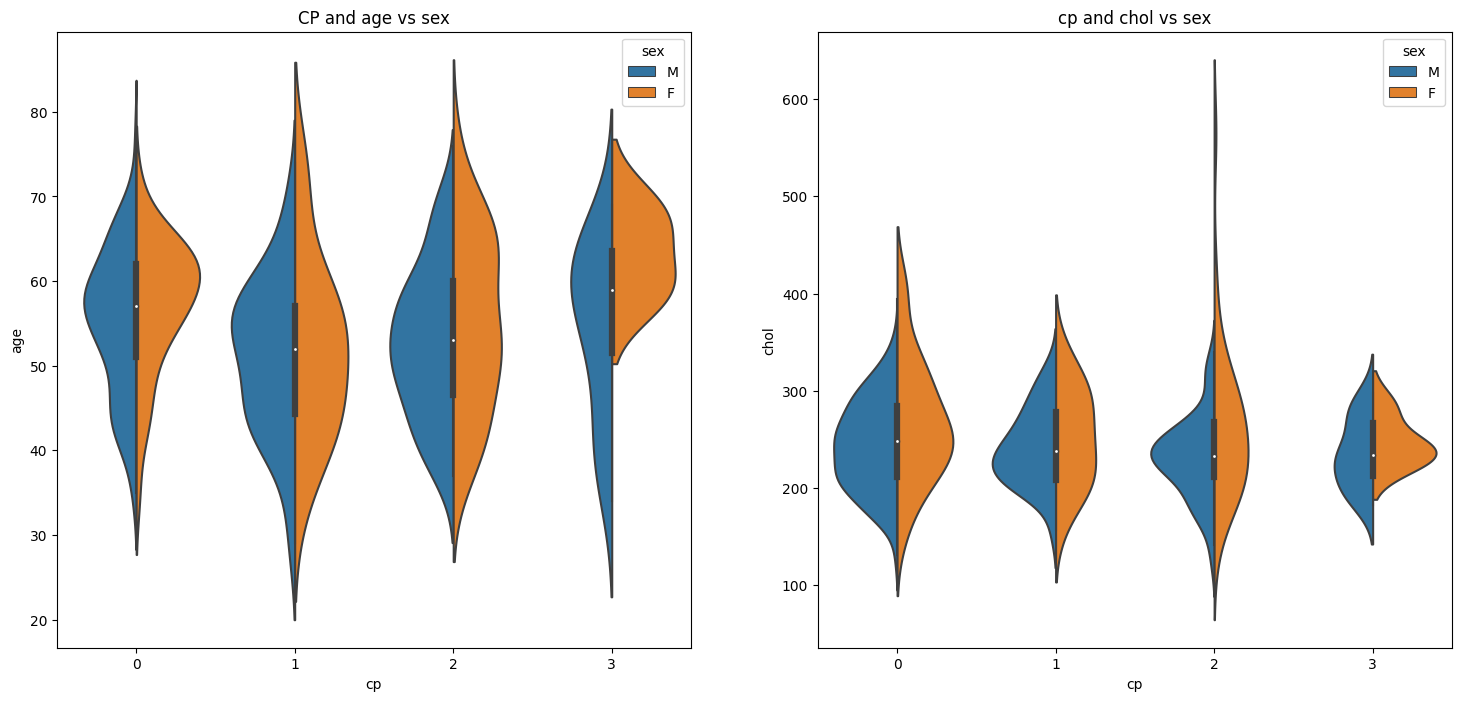

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #figure orienté objet
sns.violinplot(data=data, x= chest_pain ,y= age, hue= sex, split=True, ax=ax[0])
ax[0].set_title('CP and age vs sex')
sns.violinplot(data=data, x= chest_pain, y= chol , hue= sex, split=True, ax=ax[1])
ax[1].set_title('cp and chol vs sex')
plt.show()

6)

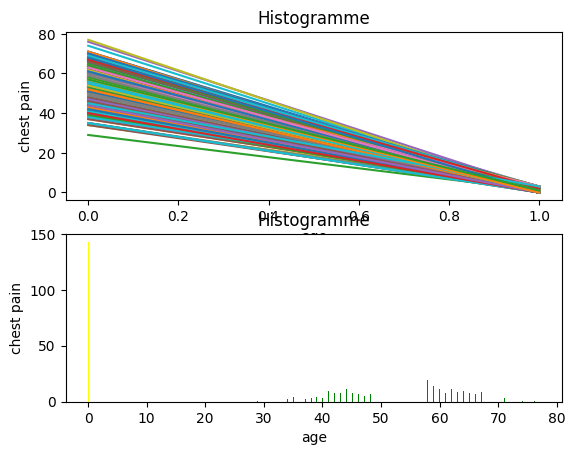

In [15]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot([y, x])
plt.title ('Histogramme')
plt.xlabel('age')
plt.ylabel('chest pain')

plt.subplot(2, 1, 2)
plt.hist([x, y],bins = 300, color = ['yellow', 'green'])
plt.title ('Histogramme')
plt.xlabel('age')
plt.ylabel('chest pain')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

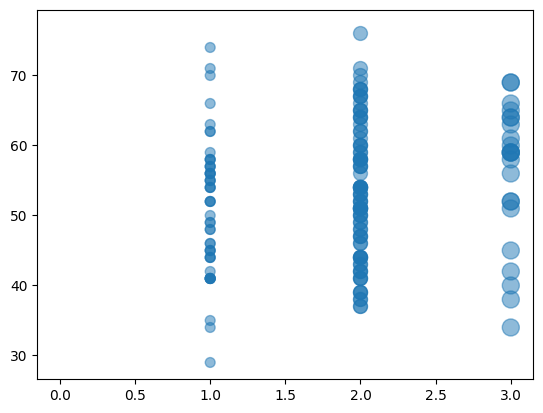

In [44]:
plt.scatter(x, y, alpha= 0.5, s= x*50)
plt.show

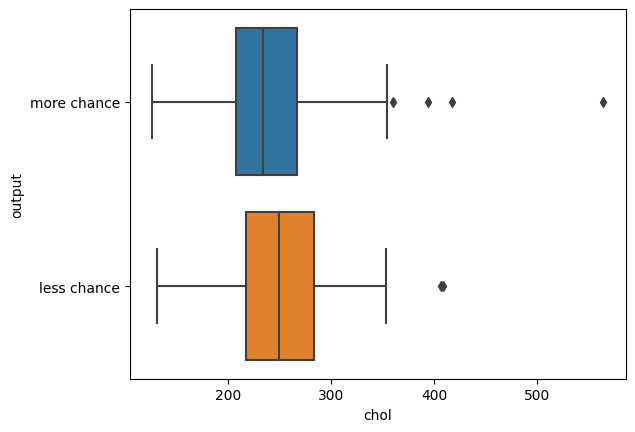

In [35]:
plt.figure()
sns.boxplot(data = data, x = chol, y = chance)
plt.show()

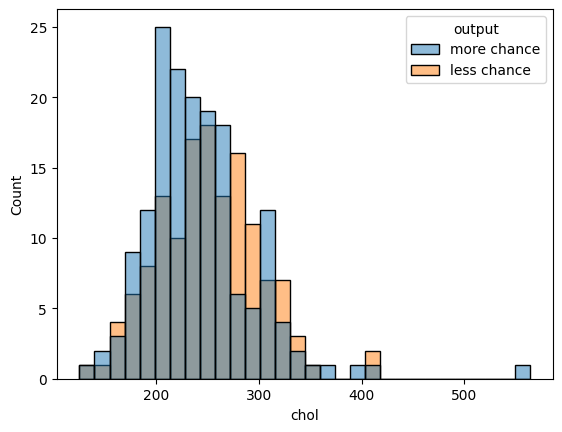

In [33]:
plt.figure()
sns.histplot(data = data, x= chol, hue = chance, bins = 30)
plt.show()

<Figure size 640x480 with 0 Axes>

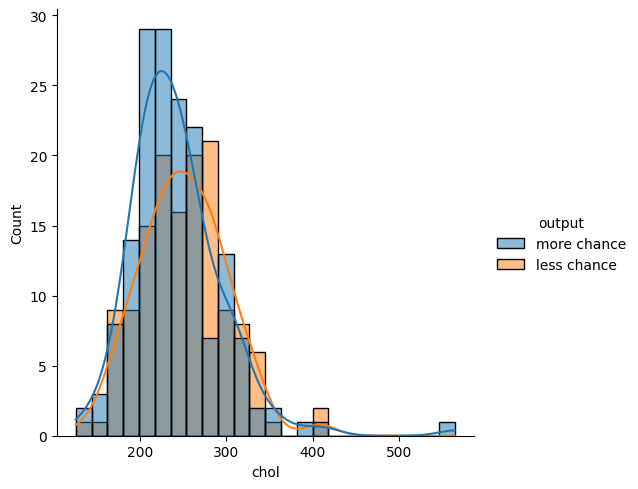

In [40]:
plt.figure()
sns.displot(data = data, x= chol, hue = chance, kde= True)
plt.show()

Observations :

- 

<Figure size 640x480 with 0 Axes>

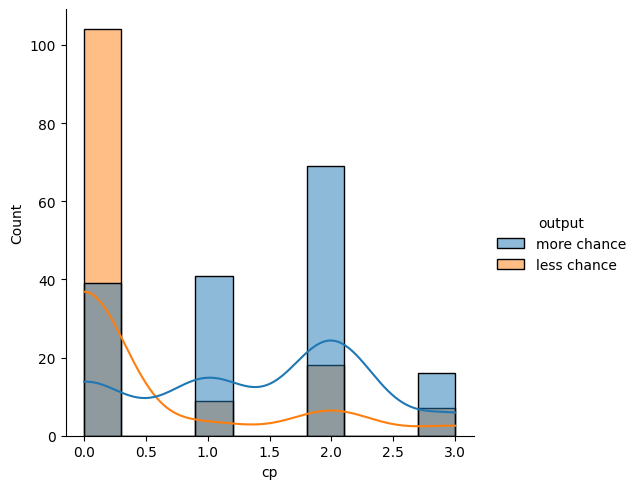

In [41]:
plt.figure()
sns.displot(data = data, x= chest_pain , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

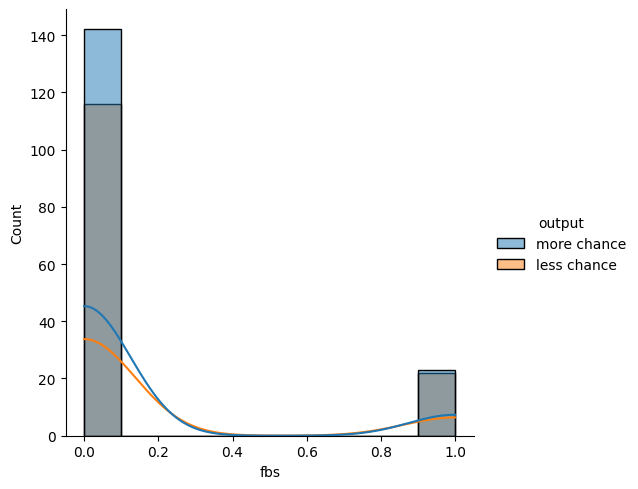

In [47]:
plt.figure()
sns.displot(data = data, x= glycemie , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

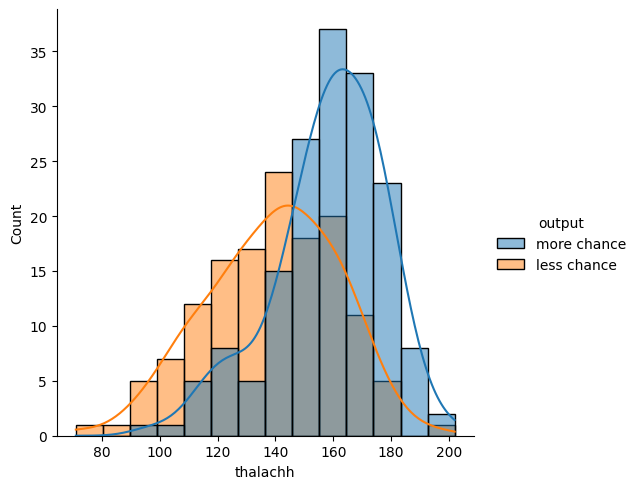

In [48]:
plt.figure()
sns.displot(data = data, x= frequence_cardiaque_max , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

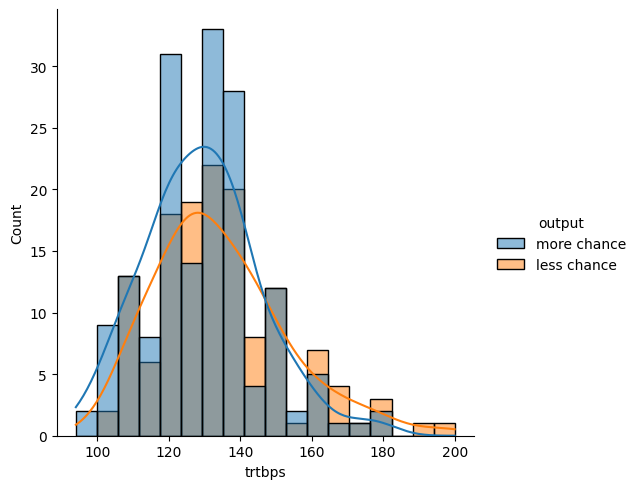

In [49]:
plt.figure()
sns.displot(data = data, x= tension_arteriel , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

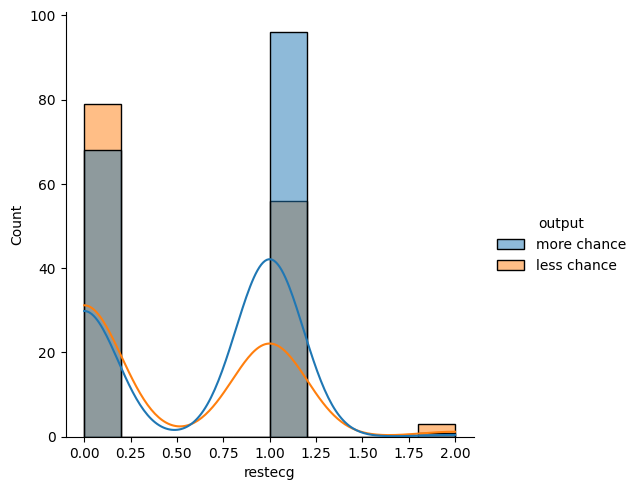

In [50]:
plt.figure()
sns.displot(data = data, x= electro_cardio , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

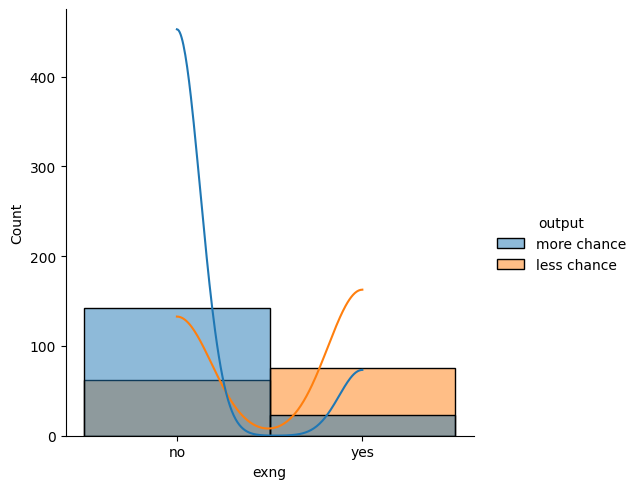

In [51]:
plt.figure()
sns.displot(data = data, x= angine , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

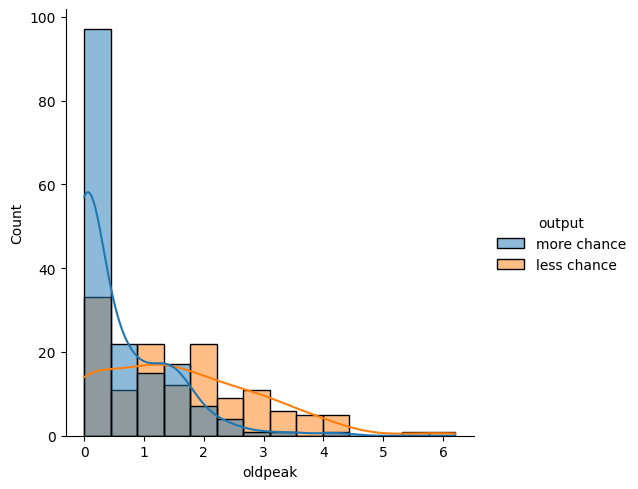

In [52]:
plt.figure()
sns.displot(data = data, x= oldpeak , hue = chance, kde= True)
plt.show()

<Figure size 640x480 with 0 Axes>

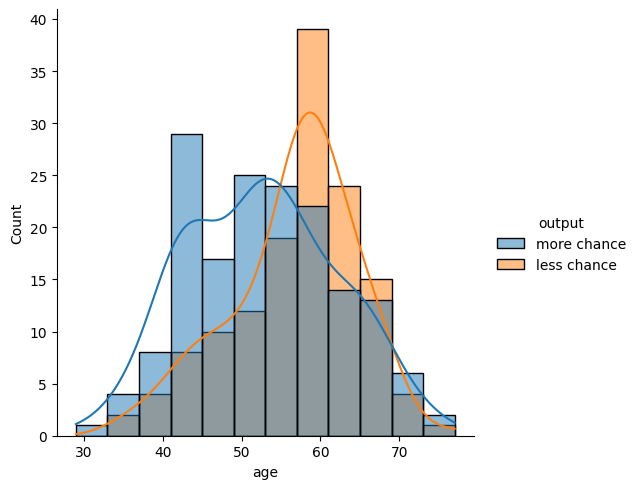

In [53]:
plt.figure()
sns.displot(data = data, x= age, hue = chance, kde= True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

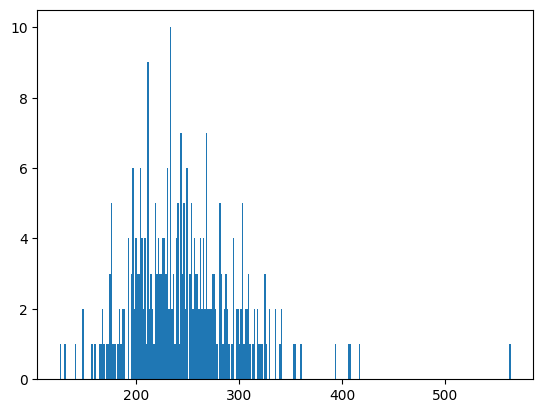

In [70]:
chol = data.chol
plt.hist(chol[:], bins= 300)
plt.show

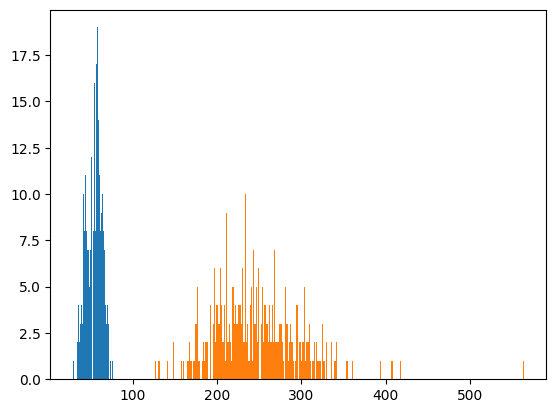

In [73]:

plt.hist(y[:], bins = 50)
plt.hist(chol[:], bins= 300)
plt.show()

ValueError: `bins` must increase monotonically, when an array

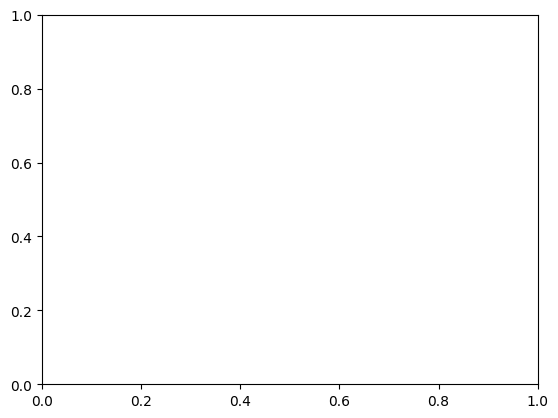

In [11]:
plt.hist(tension_arteriel[:],chol[:])
plt.show()

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()